In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv('OnlineRetail.csv', encoding='latin1')

data.head

<bound method NDFrame.head of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerI

In [32]:
# Convert string to datetime
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

data["InvoiceYearMonth"] = data["InvoiceDate"].map(lambda date: 100*date.year + date.month)

data["Revenue"] = data["UnitPrice"] * data["Quantity"]
revenue = data.groupby(["InvoiceYearMonth"])['Revenue'].sum().reset_index()

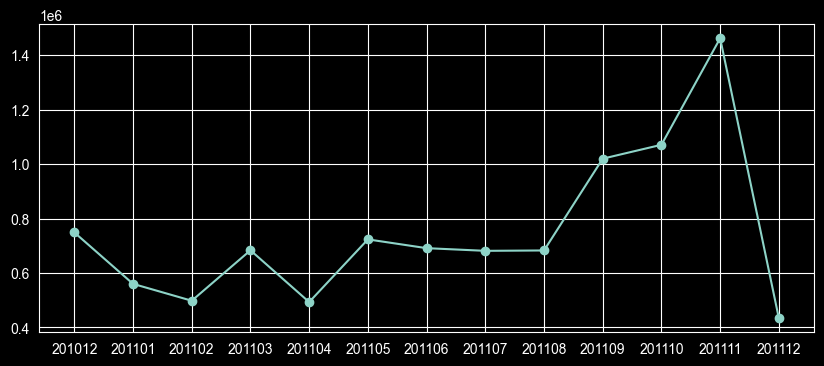

In [33]:
plt.figure(figsize = (10,4))
plt.plot(revenue['InvoiceYearMonth'].to_numpy(dtype=str), revenue['Revenue'], marker="o")
plt.show()

In [34]:
revenue["MonthlyGrowth"] = revenue["Revenue"].pct_change()
revenue.head()

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163


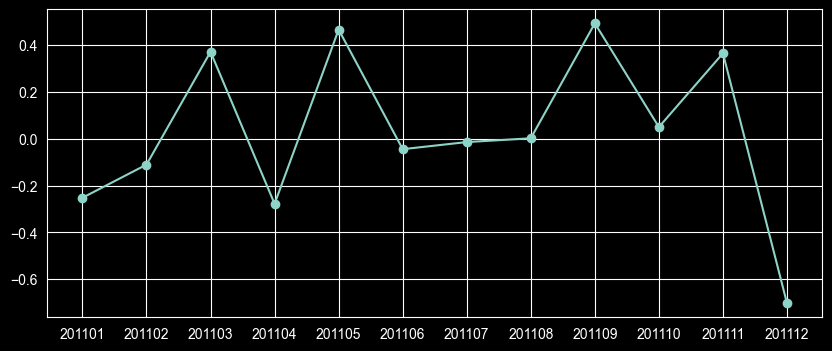

In [67]:
plt.figure(figsize = (10,4))
plt.plot(revenue['InvoiceYearMonth'].to_numpy(dtype=str), revenue['MonthlyGrowth'], marker="o")
plt.show()

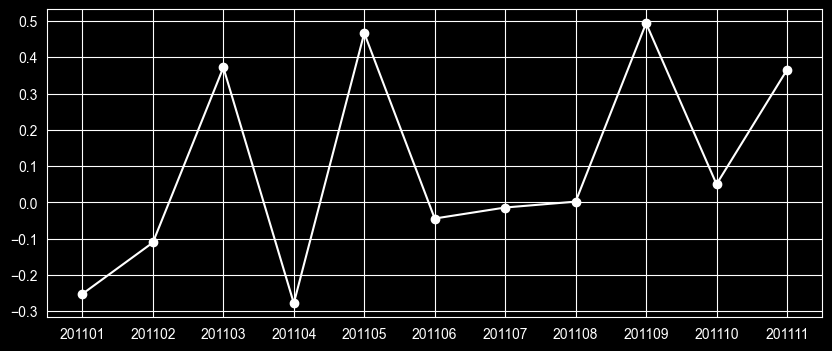

In [62]:
plt.figure(figsize = (10,4))
plt.plot(revenue.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'].to_numpy(dtype=str),
         revenue.query("InvoiceYearMonth < 201112")['MonthlyGrowth'].to_numpy(),
         marker="o", c="white")
plt.show()

In [63]:
tx_uk = data.query("Country=='United Kingdom'").reset_index(drop=True)
tx_monthly_active = tx_uk.groupby("InvoiceYearMonth")["CustomerID"].nunique().reset_index()
tx_monthly_active

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


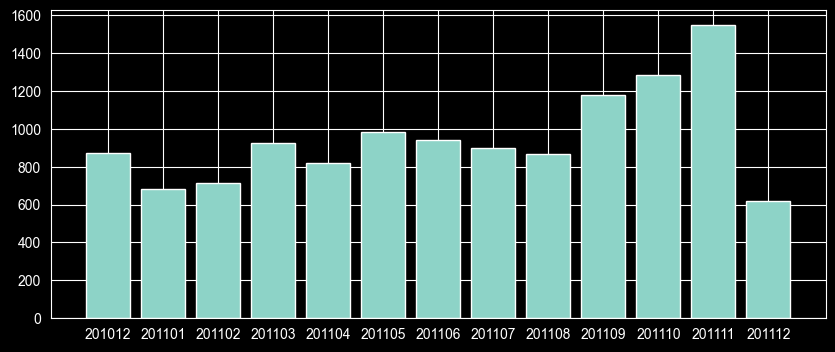

In [77]:
plt.figure(figsize = (10,4))
plt.bar(tx_monthly_active["InvoiceYearMonth"].to_numpy(dtype=str),
        tx_monthly_active["CustomerID"].to_numpy())
plt.show()

In [78]:
tx_monthly_sales = tx_uk.groupby("InvoiceYearMonth")["Quantity"].sum().reset_index()

tx_monthly_sales

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


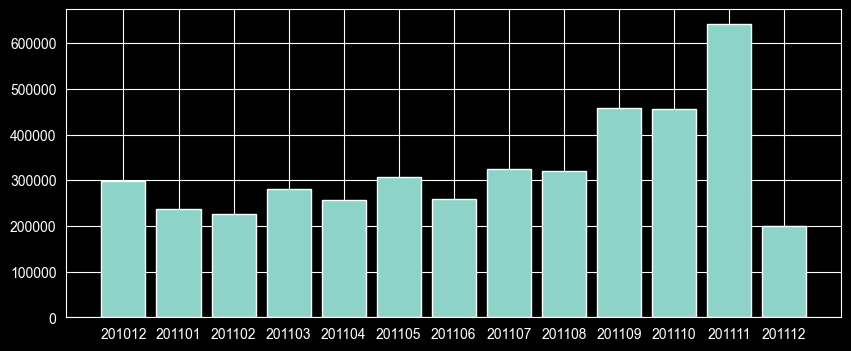

In [82]:
plt.figure(figsize = (10,4))
plt.bar(tx_monthly_active["InvoiceYearMonth"].to_numpy(dtype=str),
        tx_monthly_sales["Quantity"].to_numpy())
plt.show()

In [83]:
tx_monthly_order_avg = tx_uk.groupby("InvoiceYearMonth")["Revenue"].mean().reset_index()
tx_monthly_order_avg

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


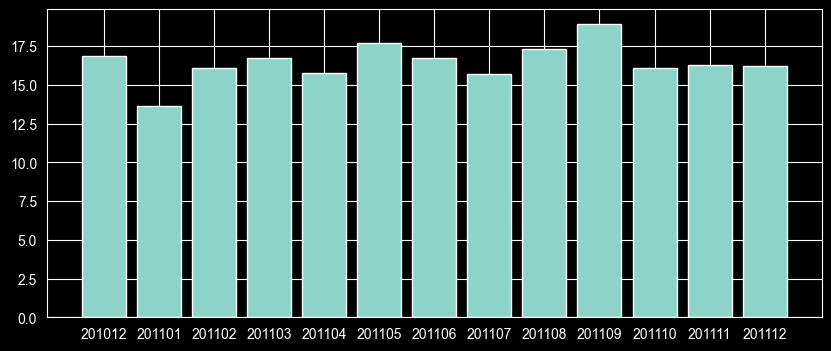

In [84]:
plt.figure(figsize = (10,4))
plt.bar(tx_monthly_order_avg["InvoiceYearMonth"].to_numpy(dtype=str),
        tx_monthly_order_avg["Revenue"].to_numpy())
plt.show()

In [92]:
tx_min_purchase = tx_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
tx_min_purchase.columns = ['CustomerID','MinPurchaseDate']
tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)
tx_uk = pd.merge(tx_uk, tx_min_purchase, on='CustomerID')
tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate_x,MinPurchaseYearMonth_x,MinPurchaseDate_y,MinPurchaseYearMonth_y,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012


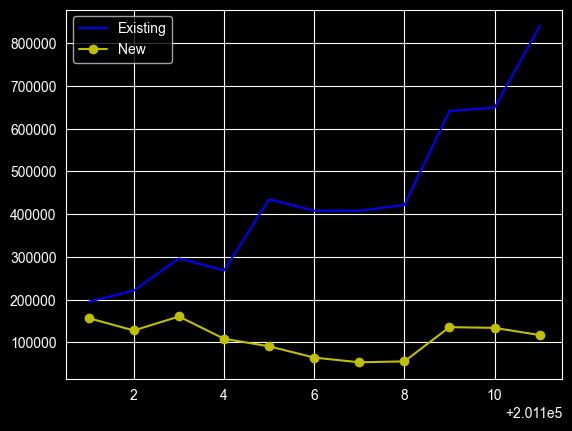

In [115]:
tx_uk['UserType'] = 'New'
tx_uk.loc[tx_uk['InvoiceYearMonth']>tx_uk['MinPurchaseYearMonth'],'UserType'] = 'Existing'
tx_user_type_revenue = tx_uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()

tx_user_type_revenue = tx_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")
plt.plot(
        tx_user_type_revenue.query("UserType == 'Existing'")['InvoiceYearMonth'],
        tx_user_type_revenue.query("UserType == 'Existing'")['Revenue'],
        label = 'Existing', c='b')
plt.plot(
        tx_user_type_revenue.query("UserType == 'New'")['InvoiceYearMonth'],
        tx_user_type_revenue.query("UserType == 'New'")['Revenue'],
        label = 'New', c='y', marker="o"
    )
plt.legend()

In [107]:
tx_user_ratio = tx_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/tx_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()
tx_user_ratio = tx_user_ratio.reset_index()
tx_user_ratio = tx_user_ratio.dropna()
tx_user_ratio

,InvoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878
10,201110,0.328852


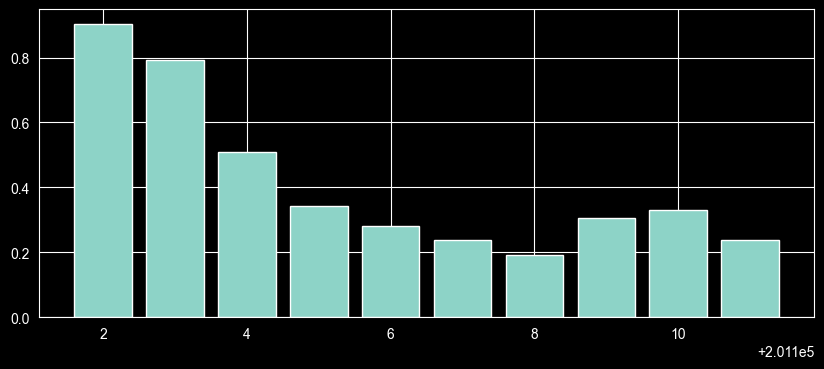

In [110]:
plt.figure(figsize = (10,4))
plt.bar(tx_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['InvoiceYearMonth'],
        tx_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['CustomerID'],)
plt.show()

In [111]:
tx_user_purchase = tx_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()

tx_retention.head()

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [112]:
months = tx_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)

tx_retention = pd.DataFrame(retention_array)
tx_retention['RetentionRate'] = tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']

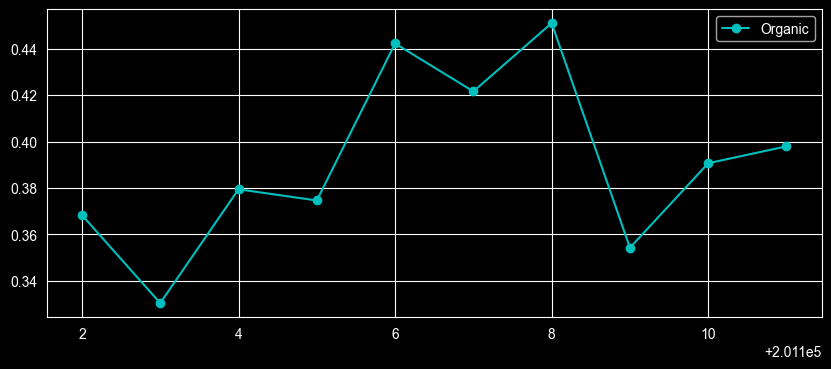

In [120]:
plt.figure(figsize = (10,4))
plt.plot(tx_retention.query("InvoiceYearMonth<201112")['InvoiceYearMonth'],
         tx_retention.query("InvoiceYearMonth<201112")['RetentionRate'],
         label="Organic", marker="o", c='c')
plt.legend()
plt.show()